## **<span style="color:gray; font-family:Garamond;"> Final Project - Group 45**
# <span style="color:black; font-family:Garamond;"> Journalists Killed Worldwide
### **<span style="color:black; font-family:Garamond;"> Name Of Students:**
**<span style="color:black; font-family:Garamond;">Lauren Mantzur<br>**
**<span style="color:black; font-family:Garamond;">Orin Karavani<br>**
**<span style="color:black; font-family:Garamond;">Omer Levi**

    

    
<div>
<img src="https://www.ifj.org/fileadmin/_processed_/e/5/csm_battleface-ifj-press-4_8a8191d543.jpg" width="800"/>
<figcaption align="center">
    <small> </small>
</figcaption>
</div>

<b id="Top"> </b>  

1. [Libraries ;](#1)
2. [Add Columns And Order ;](#2)

<a id='1'></a>

# <b id="section_1">  </b> <b style='color:brown; font-family:Garamond;'>1. Libraries ; </b> <b></b> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn as sk
from IPython.display import Image

url = 'https://raw.githubusercontent.com/lauMren/Journalists-Project/main/cpj.csv'
#define -> name of data = jour
jour = pd.read_csv(url)
jour.head(4)

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n


In [2]:
jour['Tortured'] = jour['Tortured'].str.replace(r'\n', '').str.strip()
jour['Tortured'].replace('', np.nan, inplace=True)
unique_tor = jour['Tortured'].unique()
jour
### ביצענו פעולות אלה משום שבקובץ לא ניתן לראות את התוכן תחת העמודה "עברו עינויים 

C:\Users\loren\AppData\Local\Temp\ipykernel_10380\32120313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jour['Tortured'].replace('', np.nan, inplace=True)


,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,NaN
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,NaN
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,NaN
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No
4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",No,Local,Political Group,Dangerous Assignment,NaN,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,Motive Unconfirmed,"August 3, 1992",Robinson Joseph,NaN,Haiti,Radio Lumière,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1778,Motive Unconfirmed,"July 3, 1992",Ladjid Jade Ladja,NaN,Philippines,Prensa Zamboanga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779,Motive Unconfirmed,"June 2, 1992",Mecit Akgun,NaN,Turkey,Yeni Ulke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1780,Motive Unconfirmed,"February 27, 1992",Bakshi Tirath Singh,NaN,India,Hind Samachar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
shape = jour.shape
print(shape)
jour.columns

(1782, 18)


Index(['Type', 'Date', 'Name', 'Sex', 'Country_killed', 'Organization',
       'Nationality', 'Medium', 'Job', 'Coverage', 'Freelance',
       'Local_Foreign', 'Source_fire', 'Type_death', 'Impunity_for_murder',
       'Taken_captive', 'Threatened', 'Tortured'],
      dtype='object')

# <b id="section_2">  </b> <b style='color:brown; font-family:Garamond;'>2. Add Columns And Order ; </b> <b></b> 

<div dir="rtl">

###### נבצע מספר שינויים בדאטה פריים: הוספת קטגוריות ושינויי type 

</div>

In [4]:
jour['Date'] = pd.to_datetime(jour['Date'], errors='coerce')
jour['Year'] = jour['Date'].dt.year
jour['Month'] = jour['Date'].dt.month

In [5]:
# separate by comma to make SubCategories

jour['Coverage'] = jour['Coverage'].fillna('').astype(str)

In [6]:
jour['Classify cover'] = jour['Coverage'].apply(lambda x: x.split(', '))

In [7]:
#  הפרדה של עמודת הסיקור לקטגוריות מוגדרות ללא פסיקים

unique_coverage = set([category for sublist in jour['Classify cover'] for category in sublist])
print(unique_coverage)

{'', 'Business', 'War', 'Crime', 'Culture', 'Politics', 'Human Rights', 'Corruption', 'Sports'}


In [8]:
for category in unique_coverage:
    jour[category] = jour['Classify cover'].apply(lambda x: category in x)

In [9]:
###### כאן, נהפוך את העמודות שיצרנו (שהיו בוליאנים) לטייפ אינט כדי לסכום בקלות בהמשך במידה ונצטרך

jour[['War', 'Sports', 'Human Rights', 'Politics', 'Culture','Business', 'Corruption', 'Crime']] = jour[['War', 'Sports', 'Human Rights', 'Politics', 'Culture','Business', 'Corruption', 'Crime']].astype(int)

In [10]:
jour.info()
empty = jour.isnull().sum()
jour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Type                 1782 non-null   object        
 1   Date                 1708 non-null   datetime64[ns]
 2   Name                 1782 non-null   object        
 3   Sex                  1216 non-null   object        
 4   Country_killed       1781 non-null   object        
 5   Organization         1779 non-null   object        
 6   Nationality          1499 non-null   object        
 7   Medium               1216 non-null   object        
 8   Job                  1210 non-null   object        
 9   Coverage             1782 non-null   object        
 10  Freelance            1217 non-null   object        
 11  Local_Foreign        1217 non-null   object        
 12  Source_fire          1215 non-null   object        
 13  Type_death           1217 non-nul

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,...,Classify cover,,Business,War,Crime,Culture,Politics,Human Rights,Corruption,Sports
0,Motive Confirmed,2016-10-22,Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,...,[War],False,0,1,0,0,0,0,0,0
1,Motive Confirmed,2016-10-21,Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",...,"[Politics, War]",False,0,1,0,0,1,0,0,0
2,Motive Confirmed,2016-10-02,Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",...,"[Politics, War]",False,0,1,0,0,1,0,0,0
3,Motive Confirmed,2016-08-14,Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,...,[War],False,0,1,0,0,0,0,0,0
4,Motive Confirmed,2016-08-08,Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",...,"[Business, Corruption, Crime, Culture, Human R...",False,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,Motive Unconfirmed,1992-08-03,Robinson Joseph,NaN,Haiti,Radio Lumière,NaN,NaN,NaN,,...,[],True,0,0,0,0,0,0,0,0
1778,Motive Unconfirmed,1992-07-03,Ladjid Jade Ladja,NaN,Philippines,Prensa Zamboanga,NaN,NaN,NaN,,...,[],True,0,0,0,0,0,0,0,0
1779,Motive Unconfirmed,1992-06-02,Mecit Akgun,NaN,Turkey,Yeni Ulke,NaN,NaN,NaN,,...,[],True,0,0,0,0,0,0,0,0
1780,Motive Unconfirmed,1992-02-27,Bakshi Tirath Singh,NaN,India,Hind Samachar,NaN,NaN,NaN,,...,[],True,0,0,0,0,0,0,0,0


<div dir="rtl">
    
###### 1 - הוספת עמודות: חודש ושנה
###### 2 - תחום הסיקור של העיתונאי - הפיכה מטיפוס בוליאני לנומרי, כך שכל תחום יהווה עמודה חדשה
###### 3 - תיקון העמודה tortured שלא הוצגה כראוי

</div>

# <b id="section_3">  </b> <b style='color:brown; font-family:Garamond;'>3. Review ; </b> <b></b>

In [11]:
###### לא למחוק שימושי כשנרצה לספור לא כמותי
#    .value_counts()   
##### hue='Sex' בתוך הגרף זה מחלק לפי מגדר ולפי עוד משהו כמו שיש למטה עם נשים וגברים

In [12]:
# בדיקת כמות נשים וגברים
sex_counts = jour['Sex'].value_counts()

In [13]:
total = jour['Type_death'].value_counts()

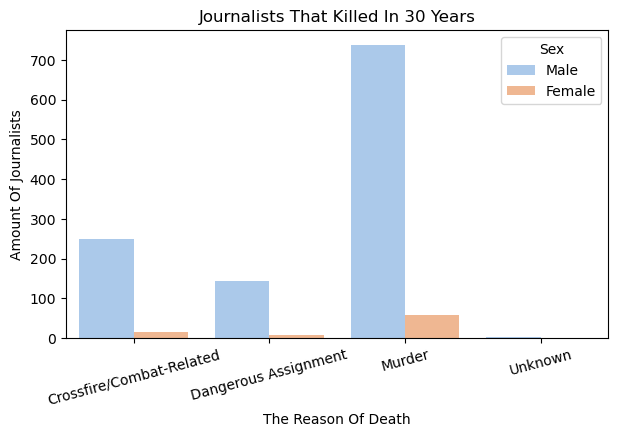

In [30]:
plt.figure(figsize=(7, 4))
sns.countplot(data=jour, x='Type_death', hue='Sex', palette='pastel')
plt.title('Journalists That Killed In 30 Years')
plt.xlabel('The Reason Of Death')
plt.ylabel('Amount Of Journalists')
plt.xticks(rotation=15)
plt.show()

<div dir="rtl"> 

##### נרצחו / מתו בלחימה או בחילופי אש / משימה מסוכנת
</div>

<div dir="rtl">

###### הרוב המוחלט של העיתונאים שנהרגו הם גברים, ייתכן וכי אלה נוכחים יותר באזורי קרב.

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\loren\AppData\Local\Temp\ipykernel_10380\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [16]:
jour = jour.dropna(subset=['Country_killed'])
countries = jour['Country_killed'].unique()

In [17]:
filtered_world = world[world['name'].isin(countries)]
top10 = filtered_world.head(10)

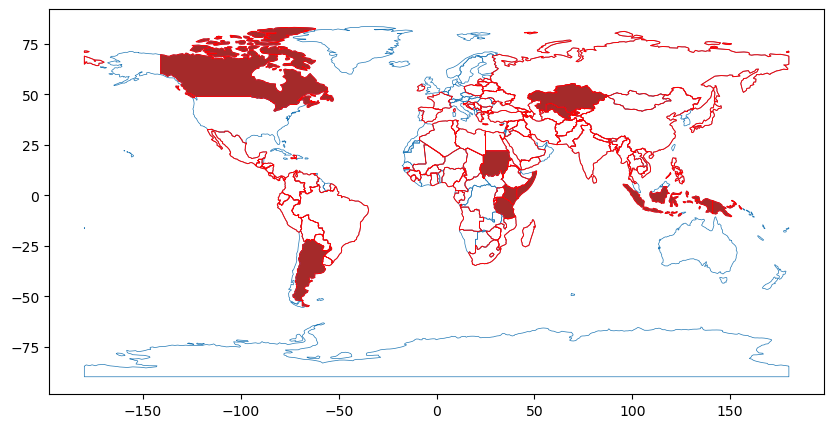

The All Countries in Red Lines: ['Iraq' 'Libya' 'Pakistan' 'Yemen' 'Syria' 'Brazil' 'Ukraine' 'Mexico'
 'Turkey' 'Afghanistan' 'India' 'Guinea' 'Somalia' 'France' 'Bangladesh'
 'Ghana' 'Colombia' 'USA' 'Poland' 'Kenya'
 'Democratic Republic of the Congo' 'Guatemala' 'South Sudan' 'Paraguay'
 'Myanmar' 'Israel and the Occupied Palestinian Territory'
 'Central African Republic' 'Philippines' 'Egypt' 'South Africa' 'Mali'
 'Russia' 'Iran' 'Cambodia' 'Tanzania' 'Ecuador' 'Lebanon' 'Indonesia'
 'Bahrain' 'Nigeria' 'Thailand' 'Azerbaijan' 'Panama' 'Peru'
 'Dominican Republic' 'Ivory Coast' 'El Salvador' 'Tunisia' 'Uganda'
 'Angola' 'Belarus' 'Greece' 'Rwanda' 'Cameroon' 'Honduras' 'Kazakhstan'
 'Sri Lanka' 'Madagascar' 'Venezuela' 'Nepal' 'Croatia' 'Georgia'
 'Bolivia' 'Kyrgyzstan' 'Eritrea' 'Zimbabwe' 'Haiti' 'Turkmenistan'
 'Sudan' 'China' 'Sierra Leone' 'Serbia' 'Gambia' 'Nicaragua'
 'Saudi Arabia' 'Japan' 'Latvia' 'UK' 'Costa Rica' 'Algeria' 'Yugoslavia'
 'Mozambique' 'Spain' 'Uruguay' '

Country_killed
Iraq              264
Philippines       133
Syria             116
Mexico             89
Pakistan           86
Name: count, dtype: int64

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
world.boundary.plot(ax=ax, linewidth=0.5)
filtered_world.boundary.plot(ax=ax, linewidth=0.7, edgecolor='red')
top10.plot(ax=ax, color='brown')
plt.show()

print('The All Countries in Red Lines:' ,jour['Country_killed'].unique())
jour[['Country_killed']].value_counts().head(5)

<div dir="rtl"> 

##### ניתן לראות כי הפריסת בעולם רחבה מאוד  
##### לכן החלטנו להציג את 5 המדינות בהן מספר העיתונאים שנהרגו הוא הגבוה ביותר 

</div>

In [165]:
### חישוב כמות
topFive = jour['Country_killed'].value_counts().nlargest(5).index

In [166]:
filtered_jour = jour[jour['Country_killed'].isin(topFive)]

<function matplotlib.pyplot.show(close=None, block=None)>

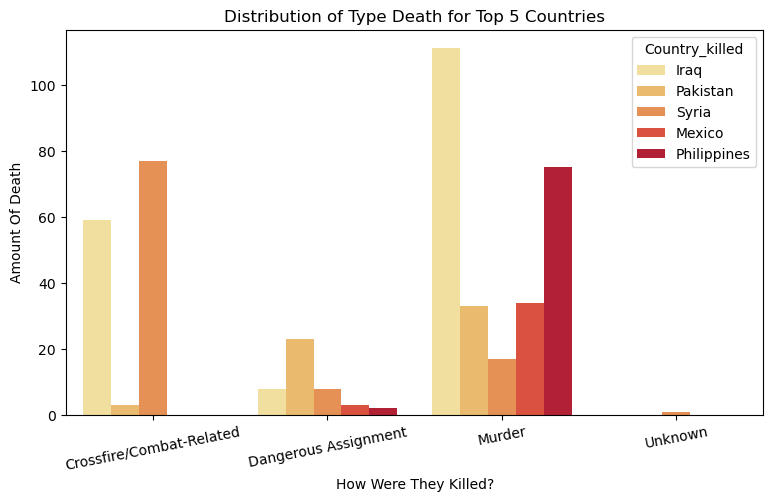

In [167]:
plt.figure(figsize=(9,5))
sns.countplot(data=filtered_jour, x='Type_death', hue='Country_killed', palette="YlOrRd")

plt.title('Distribution of Type Death for Top 5 Countries')
plt.xlabel('How Were They Killed?')
plt.ylabel('Amount Of Death')
plt.xticks(rotation=11)
plt.show

<div dir="rtl">
    
##### הגרף מציג לנו את הצורה בה נהרגו עיתונאים במספר מדינות.

##### באופן מפתיע, רצח, היא הסיבה העיקרית למותם ולא הריגה בשוגג. 

##### ניתן לראות מהגרף, שבמדינות עולם שלישי, הרוויות בפשיעה, יש רוב של נרצחים - מה שמתכתב גם עם ההיגיון.
  
##### בסוריה לעומת זאת, מדינה עם מלחמות חיצוניות ופנימיות כאחד, הרוב המוחלט נהרגו בחילופי אש ולא במכוון.
    
##### גם בעיראק, רצח הוא המוביל. אך דבר זה גורם לתהייה, שהרי עיראק בדומה לסוריה, חווה מלחמות רבות, ועדיין, פי 2 מכלל העיתונאים נהרגו במכוון

</div>

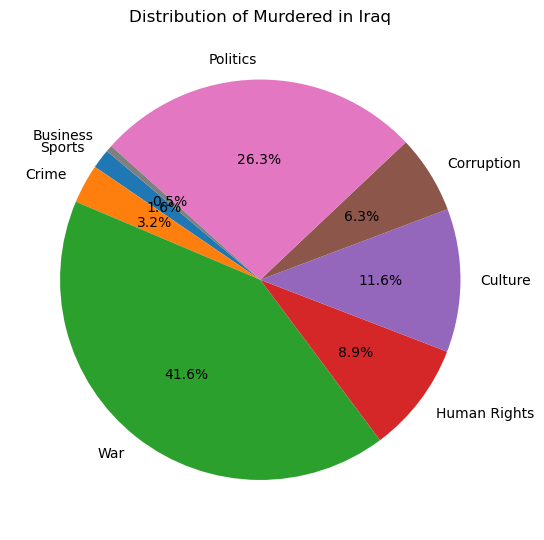

In [168]:
iraq_murdered = jour[(jour['Country_killed'] == 'Iraq') & (jour['Type_death'] == 'Murder')]

sports = iraq_murdered['Sports'].sum()
crime = iraq_murdered['Crime'].sum()
war = iraq_murdered['War'].sum()
human_rights = iraq_murdered['Human Rights'].sum()
culture = iraq_murdered['Culture'].sum()
corruption = iraq_murdered['Corruption'].sum()
politics = iraq_murdered['Politics'].sum()
busines = iraq_murdered['Business'].sum()


counts = [sports, crime, war, human_rights, culture, corruption, politics, busines]
fields = ['Sports', 'Crime', 'War', 'Human Rights', 'Culture', 'Corruption', 'Politics', 'Business']

plt.figure(figsize=(6.5, 6.5))
plt.pie(counts, labels=fields, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Murdered in Iraq')
plt.show()

##       משום שישנם עיתונאים שסיקרו תחומים שונים, הראנו את ההתפלגות באחוזים ולא בצורה נומרית.
## במידה והיינו מציגים בצורה כמותית, הספירה הייתה עוברת את כמות הנרצחים באופן כללי מה שלא ייתכן

<div dir="rtl">

##### על פי התפלגות זו, אנו רואים שכמעט חצי מהרצחים היו כתבים שסיקרו את המלחמה (כתבים צבאיים למיניהם), והשאר באים מתחומים שונים כמו זכויות אדם, שחיתות וכו.

In [169]:
jour['Date'].value_counts().head(10).index

DatetimeIndex(['2009-11-23', '2006-10-12', '2015-01-07', '2004-02-01',
               '1997-11-19', '2015-01-25', '1994-06-01', '2013-12-23',
               '1993-10-03', '2003-10-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

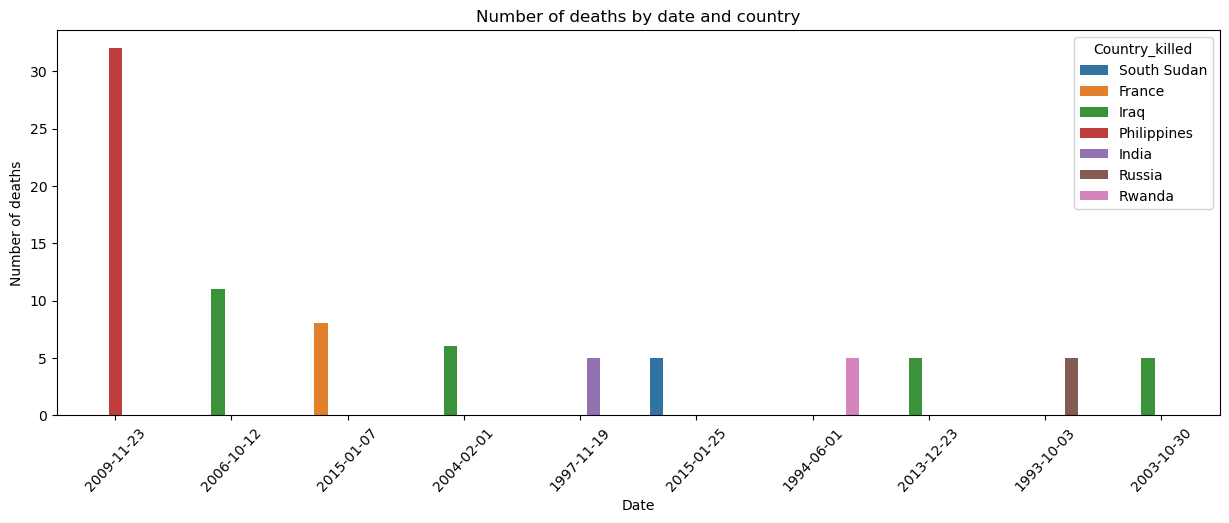

In [201]:
plt.figure(figsize=(15, 5))
selected_dates = jour['Date'].value_counts().head(10).index
filtered_data = jour.loc[jour["Date"].isin(selected_dates)]
myorder = ['2009-11-23', '2006-10-12', '2015-01-07', '2004-02-01',
               '1997-11-19', '2015-01-25', '1994-06-01', '2013-12-23',
               '1993-10-03', '2003-10-30']

sns.countplot(x="Date", hue="Country_killed", data=filtered_data, order=myorder)
plt.title("Number of deaths by date and country")
plt.ylabel("Number of deaths")
plt.xlabel("Date")
plt.xticks(rotation=47)
plt.show()

# העמודות לא ממורכזות בגלל שיש מדינות נוספות בהן נהרגו בתאריכים אלה, אשר אינן מוצגות כאן

<div dir="rtl">
    
### ראינו קודם כי הפיליפינים ועיראק מובילות במקרי הרצח, לכן רצינו לבדוק ריכוז הרוגים על פי תאריכים ספציפיים:  
    
#### אירוע מרכזי בפיליפינים ב-23 בנובמבר 2009
**טבח מינדאנו:** באותו יום התרחש טבח במינדנאו שבפיליפינים. הטבח הזה נחשב לאחת התקריות האלימות הקשות ביותר נגד אנשי תקשורת. במהלך התקרית, חמושים רצחו לפחות 57 בני אדם, בינהם לפחות 32 עיתונאים, עורכי דין ותומכים של פוליטיקאי מקומי שהיה אמור להגיש את מועמדותו לבחירות המקומיות. 

#### אירוע מרכזי בעיראק ב-12 באוקטובר 2006
באותו יום היו מספר פיגועים ותקיפות אלימות ברחבי עיראק שגרמו למותם של עשרות, וביניהם עיתונאים עיראקים. הפיגועים התרחשו על רקע הסכסוך בין פלגים שונים במדינה.
    
ובאופן כללי, מאז הפלישה האמריקאית ב-2003, המדינה הייתה שקועה במערבולת של אלימות עדתית, טרור ופעילות מיליציות חמושות, שהפכו את עבודתם של העיתונאים למסוכנת במיוחד.      על פי נתוני ארגונים בינלאומיים לזכויות עיתונאים, עשרות עיתונאים נהרגו בעיראק מאז תחילת הסכסוך, רבים מהם כתוצאה מהתקפות מכוונות.


#### אירוע מרכזי בצרפת ב-07  בינואר 2015   
**מתקפת הטרור על מערכת העיתון "שארלי הבדו" בפריז:** באותו יום מחבלים נכנסו למשרדי העיתון הסאטירי "שארלי הבדו" בפריז ופתחו באש. בין ההרוגים היו עורכים, קריקטוריסטים, עיתונאים ושני שוטרים. המתקפה בוצעה על ידי פעילי ג'יהאד האיסלאמי והייתה תגובה לתוכן שפרסם העיתון, שנחשב פוגעני כלפי האסלאם

</div>

In [203]:
jour.loc[jour['Organization'].isin(['Freelance', 'freelance', 'Freelancer']), 'Organization'] = 'Freelancer'

In [233]:
TenOrganizations = jour['Organization'].value_counts().head(10)

In [234]:
TenNationality = jour['Nationality'].value_counts().head(10)

In [235]:
TenJob = jour['Job'].value_counts().head(10)

In [236]:
TenMedium = jour['Medium'].value_counts().head(10)

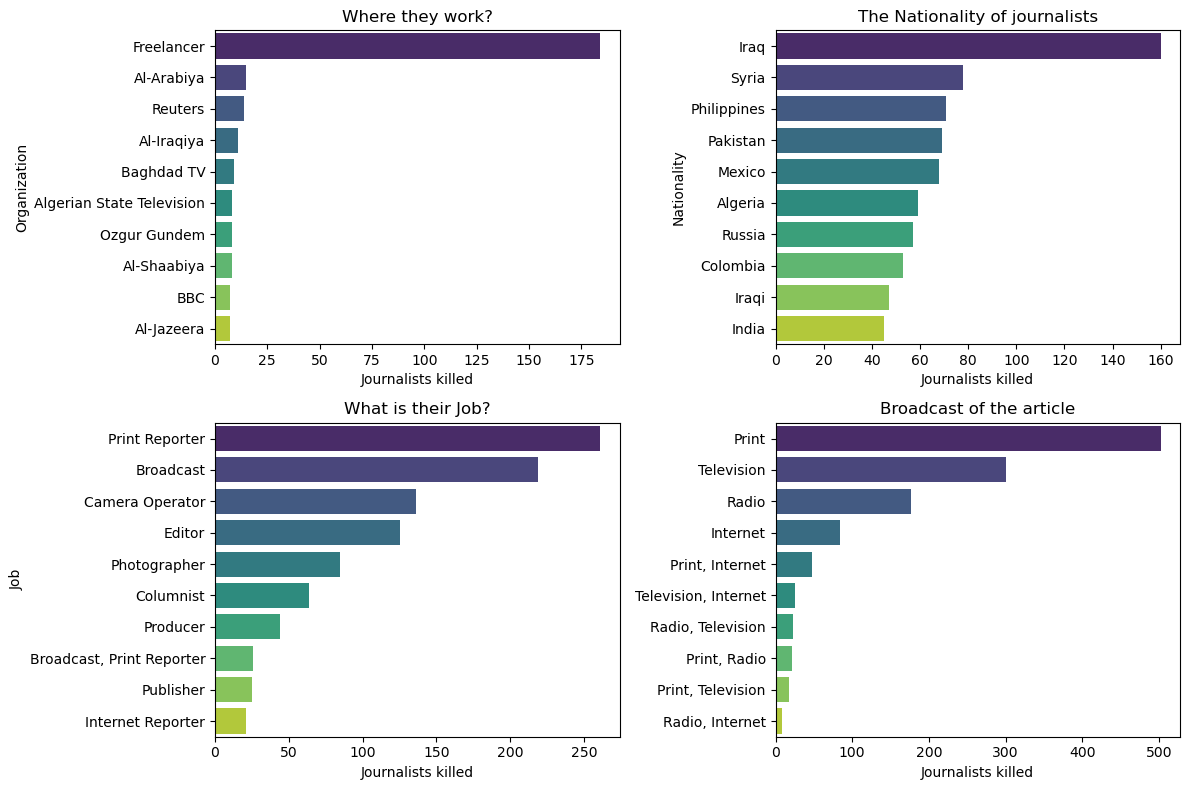

In [238]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# גרף 1 - ארגונים
sns.barplot(ax=axes[0, 0], x=TenOrganizations, y=TenOrganizations.index, palette='viridis')
axes[0, 0].set_title('Where they work?')
axes[0, 0].set_xlabel('Journalists killed')
axes[0, 0].set_ylabel('Organization')

# גרף 2 - לאום
sns.barplot(ax=axes[0, 1], x=TenNationality, y=TenNationality.index, palette='viridis')
axes[0, 1].set_title('The Nationality of journalists')
axes[0, 1].set_xlabel('Journalists killed')
axes[0, 1].set_ylabel('Nationality')

# גרף 3 - תפקיד
sns.barplot(ax=axes[1, 0], x=TenJob, y=TenJob.index, palette='viridis')
axes[1, 0].set_title('What is their Job?')
axes[1, 0].set_xlabel('Journalists killed')
axes[1, 0].set_ylabel('Job')

# גרף 4 - מדינות
sns.barplot(ax=axes[1, 1], x=TenMedium, y=TenMedium.index, palette='viridis')
axes[1, 1].set_title('Broadcast of the article')
axes[1, 1].set_xlabel('Journalists killed')
axes[1, 1].set_ylabel('')
plt.tight_layout()
plt.show()

<div dir="rtl">

#### על פי גרף 1 - פרילנסרים נהרגים משמעותית יותר מכאלה שעובדים בערוץ מוסדר.  האם כדאי לקחת סיכון בסיקור כל עוד אינך עובד בחברה מסויימת?
####  גרף 2 מראה לנו שכתבים שהציגו את הכתבות בעיתון או בטלוויזיה נהרגו יותר מכאלה ששידרו ברדיו , האם יש קשר לחשיפה שלהם? האם ברגע שיודעים מי הם הם פגיעים יותר?
##### יש לציין כי ב2007 היו הכי הרבה הרוגים מכל המדינות, תקופה שבה אנשים לא השתמשו באינטרנט אלא צרכו את התכנים שלהם מעיתונים או מטלוויזיה, לכן הגיוני שבשנים האלה הכתבים ברובם היו גם כתבי טלוויזיה.

In [269]:
print(jour['Year'].value_counts())

Year
2007.0    108
2012.0    101
2006.0    101
2009.0     99
2013.0     97
2015.0     92
2004.0     86
2014.0     86
1994.0     81
2011.0     79
2010.0     78
2008.0     68
1993.0     66
2005.0     63
1995.0     59
2003.0     58
2001.0     54
1999.0     52
1992.0     50
2016.0     47
2000.0     45
1998.0     36
1997.0     35
1996.0     34
2002.0     32
Name: count, dtype: int64


In [287]:
from scipy.stats import chi2_contingency

In [288]:
jour['Murder'] = jour['Type_death'] == 'Murder'

C:\Users\loren\AppData\Local\Temp\ipykernel_10380\251797876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jour['Murder'] = jour['Type_death'] == 'Murder'


In [289]:
contingency_table = pd.crosstab(jour['Nationality'], jour['Murder'])

In [290]:
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 420.1299512315352
P-value: 1.3974761254956955e-23


In [291]:
top_nationalities = contingency_table.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_data = jour[jour['Nationality'].isin(top_nationalities)]

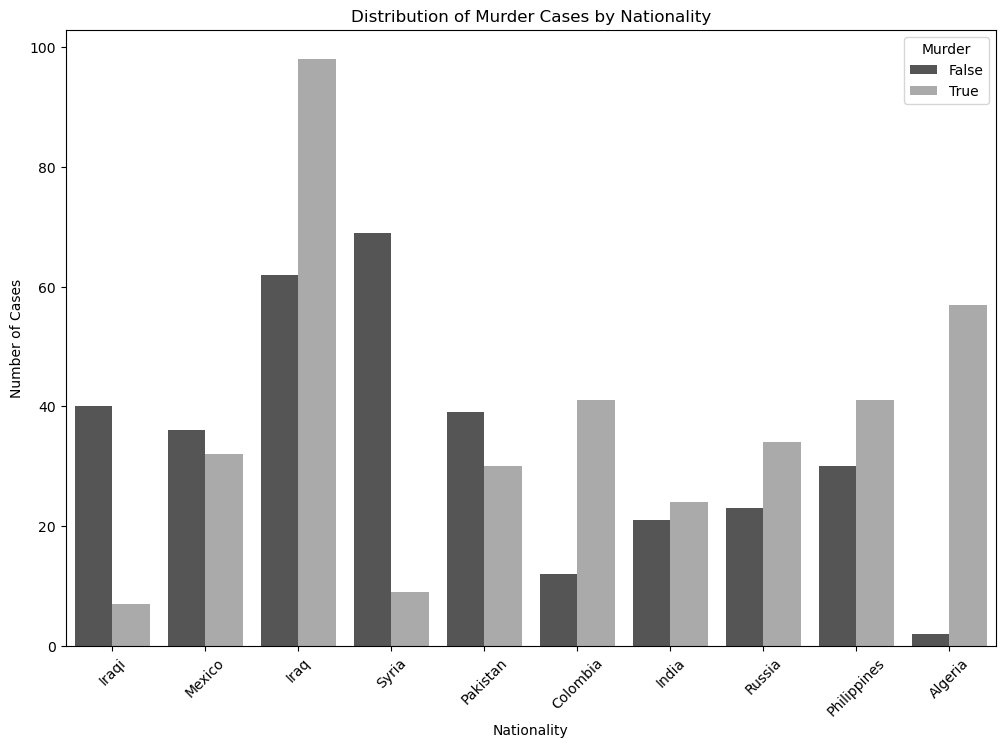

In [292]:
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, x='Nationality', hue='Murder', palette='gray')
plt.title('Distribution of Murder Cases by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#######

In [280]:
from scipy.stats import pearsonr

In [284]:
death_per_year = jour['Year'].value_counts().sort_index()
years = death_per_year.index.values
deaths = death_per_year.values
correlation, p_value = pearsonr(years, deaths)

Pearson correlation coefficient: 0.5613190718781865
P-value: 0.00350643884786982


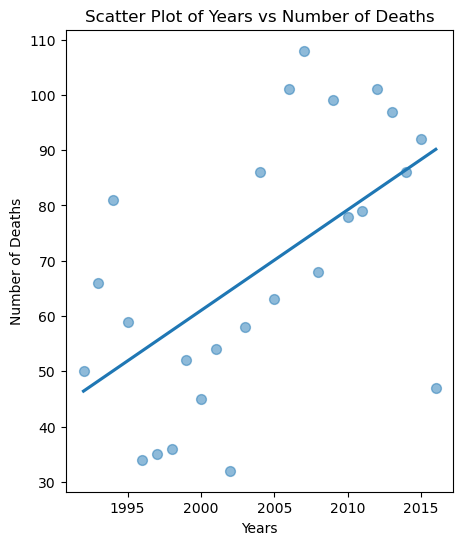

In [286]:
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

plt.figure(figsize=(5, 6))
sns.regplot(x=years, y=deaths, ci=None, scatter_kws={"s": 50, "alpha": 0.5})
plt.xlabel('Years')
plt.ylabel('Number of Deaths')
plt.title('Scatter Plot of Years vs Number of Deaths')
plt.show()

In [ ]:
########### סוף בדיקה

In [275]:
death_per_year = jour.groupby(['Year', 'Type_death']).size().unstack(fill_value=0)

In [276]:
prediction_mur = 'Murder'
years = death_per_year.index.values.reshape(-1, 1)
deaths = death_per_year[prediction_mur].values

In [277]:
model = LinearRegression()
model.fit(years, deaths)
predictions = model.predict(years)
year_2024 = np.array([[2024]])
pred_2024 = model.predict(year_2024)

In [278]:
mse = mean_squared_error(deaths, predictions)
r2 = r2_score(deaths, predictions)

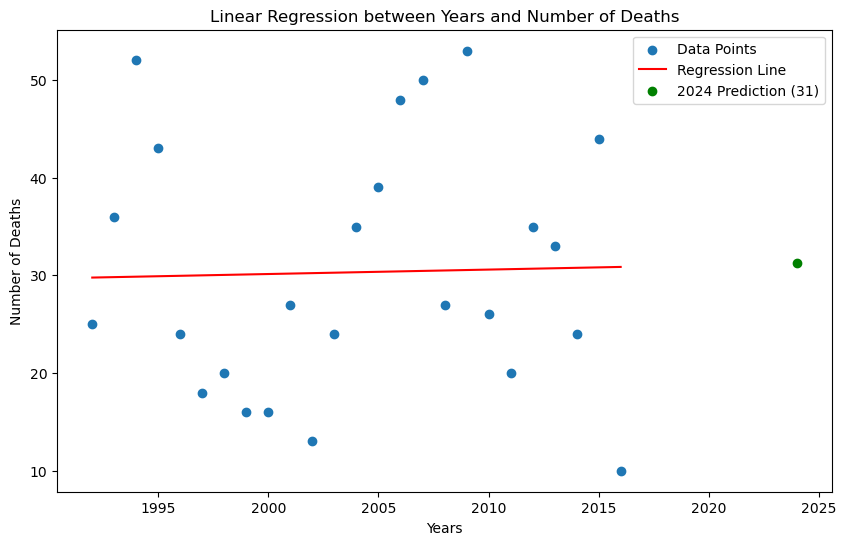

In [279]:
plt.figure(figsize=(10, 6))
plt.scatter(years, deaths, label='Data Points')
plt.plot(years, predictions, color='red', label='Regression Line')

plt.scatter([2024], pred_2024, color='green', label=f'2024 Prediction ({int(pred_2024[0])})')
plt.xlabel('Years')
plt.ylabel('Number of Deaths')
plt.title('Linear Regression between Years and Number of Deaths')
plt.legend()
plt.show()

# האם יש קשר בין ההתקדמות בשנים וכמות ההרוגים? האם מדי שנה הכמות עולה ועולה משום שהיחס לעיתונאים הרבה יותר אלים ופחות מכבד? 

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

KeyError: 'Columns not found: 66, 68, 78, 79, 81, 86, 92, 32, 97, 34, 35, 36, 99, 101, 108, 45, 47, 50, 52, 54, 58, 59, 63'

In [181]:
kidnapped = jour['Taken_captive'].value_counts()
print(kidnapped)

Taken_captive
No      917
Yes     188
Yes       2
Name: count, dtype: int64


In [182]:
Impunity = jour['Impunity_for_murder'].value_counts()
print(Impunity)

Impunity_for_murder
Yes        687
Partial     75
No          35
Name: count, dtype: int64
